# 幂律分布绘制与估计

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
# 'serif', 'sans-serif', 'monospace', 'fantasy', 'cursive'
cnFont = {'fontname':'Songti SC', 'color':'darkred', 'weight':'bold', 'size': 30}
# plt.rcParams['figure.dpi'] = 400
import seaborn as sns
import scienceplots
import numpy as np
from scipy import stats
from scipy import optimize
import pandas as pd
from pandas import Series,DataFrame
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import networkx as nx
import powerlaw

## 1、精确地绘制幂律分布

In [2]:
df1 = pd.read_csv("data/internet.edgelist.txt", sep="\t")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())

degree_seq1 = [G1.degree(i) for i in G1.nodes()]

<AxesSubplot: >

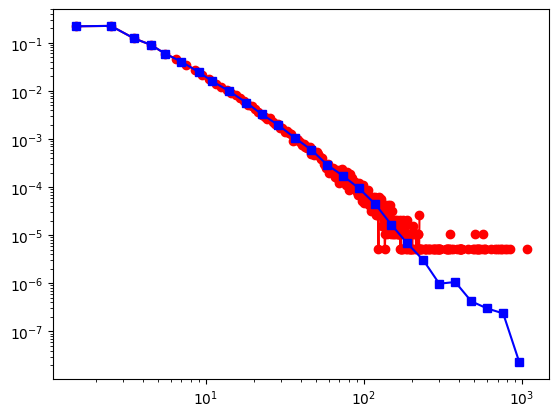

In [3]:
# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = False, color = 'b', marker='s')

<AxesSubplot: >

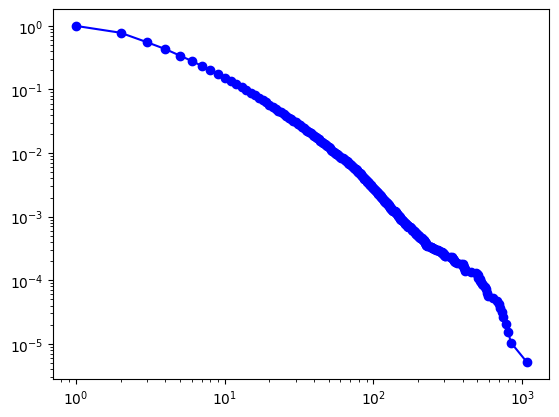

In [4]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq1, color = 'b', marker='o')

In [5]:
# BA无标度网络
G2 = nx.barabasi_albert_graph(100000,2)
degree_seq2 = [G2.degree(i) for i in G2.nodes()]

<AxesSubplot: >

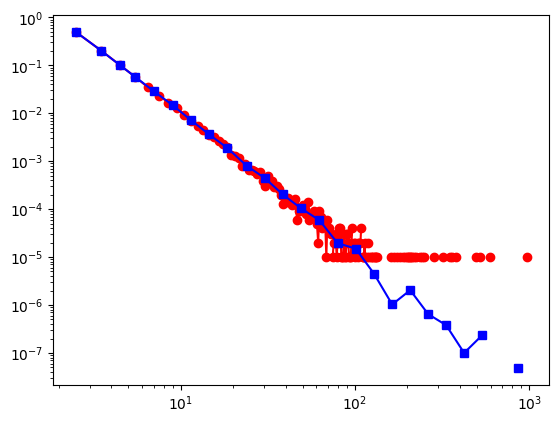

In [6]:
# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = False, color = 'b', marker='s')

<AxesSubplot: >

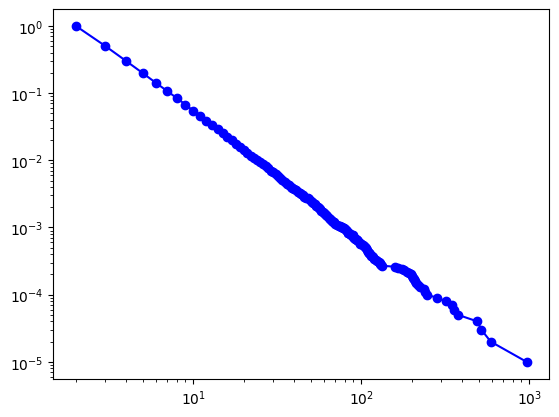

In [7]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq2, color = 'b', marker='o')

## 2、估计度指数

In [8]:
fit = powerlaw.Fit(degree_seq1)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

Calculating best minimal value for power law fit
kmin: 75.0ess: 99%
gamma: 3.4653996272606102
D: 0.019052157470934694


In [9]:
fit = powerlaw.Fit(degree_seq2)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

Calculating best minimal value for power law fit
kmin: 13.0ess: 99%
gamma: 3.0565104130282124
D: 0.02301345041516656


In [10]:
fit = powerlaw.Fit(degree_seq2, xmin = 1.0)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

kmin: 1.0
gamma: 1.8924173187955935
D: 0.4612892792840876


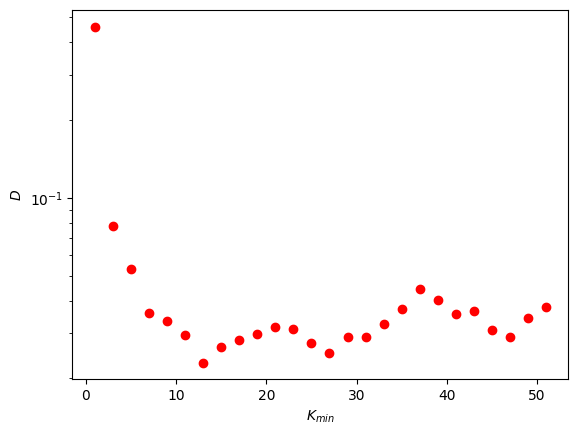

In [11]:
D_list = []
for x in np.linspace(1,51,26):
    fit = powerlaw.Fit(degree_seq2, xmin = x)
    D_list.append(fit.power_law.D)

plt.plot(np.linspace(1,51,26), D_list, "ro")
plt.xlabel("$K_{min}$")
plt.ylabel("$D$")
plt.yscale("log")